# Trabalho T1 EA044 - Formulação de Modelos de Otimização
Aluno(a): Maria Giulia Martins

Curso: 34 - Engenharia de Computação

# Análise do Problema
Antes de respondermos às perguntas solicitadas, vamos modelar o nosso problema, analisando-o conforme as Etapas da Modelagem a seguir:

# Etapas da Modelagem

## Formular o Problema
Nosso problema consiste em encontrar uma expressão para o lucro da empresa em questão e maximizá-lo.

## Observar o Sistema
Neste problema, são apresentadas duas equações que o modelam, são elas:

Equação que relaciona o preço _p_ com a quantidade _q_ de cremes:
$$p = 10 - 0.01q$$

Equação que relaciona o custo _c_ por quantidade _q_ de cremes produzidos:
$$c = 500 + 5q$$

## Formular o Modelo Matemático
### Análise das Equações
Sabemos que o custo _c_ e o preço _p_ são ambos da grandeza "dinheiro", então:
$$ R$ = 500 + 5*q$$
$$ R$ = 10 - 0.01*q$$

### Definição do Lucro
O lucro no nosso problema é dado pela equação:
$$ lucro = l(receita, custo) = l(r, c) = r - c$$
Onde a Receita vamos definir abaixo e o nosso custo já foi dado no problema.
#### Receita
A Receita é definida como:
$$ receita = preço * quantidade$$
$$ \Rightarrow r = p * q$$
$$ \Rightarrow r = (10 - 0.01*q) * q$$
$$ \Rightarrow r = 10*q - 0.01*q^2$$

#### Lucro
Com isso podemos definir a nossa expressão para o Lucro:
$$ l(r,c) = r - c$$
$$ \Rightarrow l(r, c) = 10*q - 0.01*q^2 - (500 + 5*q)$$
$$\Rightarrow l(r, c) = -0.01q^2 - 5q - 500$$

### Definição da Função Objetivo
Como nosso objetivo final é a maxização do Lucro, então nossa Função Objetivo é dada pela expressão do lucro:
$$ l(r, c) = -0.01q^2 - 5q - 500$$

### Variáveis de Decisão
As variáveis de decisão são aquelas que estão diretamente relacionadas com a nossa Função Objetivo e com o nosso problema, neste caso temos:
1. preço _p_
2. quantidade _q_

## Verificar / Validar o Problema
### Restrições
Para que o nosso problema coincida com o "mundo real", devemos aplicar restrições a ele. Neste caso, como procuramos o lucro máximo, precisamos, pelo menos, que a expressão matemática que caracteriza o preço seja maior que zero. Então:
$$ p > 0 $$

## Solucionar o Problema
Para solucionar o problema, vamos utilizar do solver do Scipy.

Mas antes, vamos plotar as equações das análises que fizemos acima.

Biblitoecas que vamos utilizar:

In [1]:
import matplotlib.pyplot as plt #biblioteca para plotarmos os gráficos
import numpy as np #biblioteca para criarmos arrays eficientes

Atribuindo um conjunto de valores para _q_ e _p_ para termos uma regiao de potagem:

In [2]:
q = np.arange(-1000, 20000)
p = np.arange(-1000, 20000)

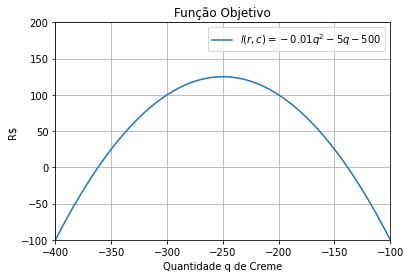

In [3]:
f_objetivo = -0.01*q*q - 5*q - 500 #funcao objetivo do nosso problema
plt.plot(q, f_objetivo,  label = r"$l(r, c) = -0.01q^2 - 5q -500$")
plt.legend()
plt.title("Função Objetivo")
plt.xlabel("Quantidade q de Creme")
plt.ylabel("R$")
plt.xlim(-400, -100)
plt.ylim(-100, 200)
plt.grid()
plt.show()

### Foco do nosso Problema
Nosso problema lida com o conceito de maximização de uma função. Em cálculo, isso significa que devemos derivar nossa Função Objetivo e igualá-la a zero para encontrar seus pontos de máximo (ou mínimo)>

No nosso caso, acabamos de plotar acima o gráfico que descreve nossa Função Objetivo e vimos que ela é uma parábola situada no 2º e 3º quadrante, então sabemos que a nossa técnica de derivar vai apontar para seu máximo global.

Dito isso temos:
$$ l(r, c) = -0.01q^2 - 5q -500$$
Então a derivada fica:
$$ \frac{d}{dq}l(r, c) = -0.02q + 120$$

Vamos plotar a Função Objetivo juntamente com a sua derivada:

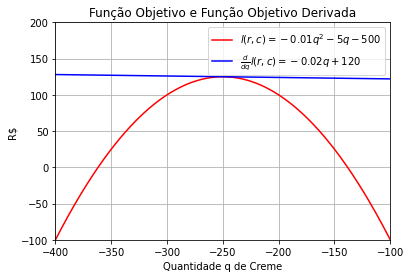

In [4]:
f_objetivo = -0.01*q*q - 5*q - 500 #funcao objetivo
f_objetivo_derivada = -0.02*q+120 #função objetivo derivada
plt.plot(q, f_objetivo, color = "r", label = r"$l(r, c) = -0.01q^2 - 5q -500$")
plt.plot(q, f_objetivo_derivada, color = "b", label = r"$\frac{d}{dq}l(r, c) = -0.02q + 120$")
plt.legend()
plt.title("Função Objetivo e Função Objetivo Derivada")
plt.xlabel("Quantidade q de Creme")
plt.ylabel("R$")
plt.xlim(-400, -100)
plt.ylim(-100, 200)
plt.grid()
plt.show()

### Foco nas Restrições
Vamos agregar ao gráfico nossas restrições:

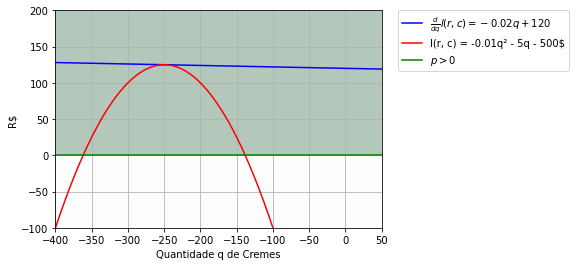

In [5]:
#Nesta parte vamos criar a restrição do preço > 0:
d = np.linspace(-1000,20000, 3000)
x,y = np.meshgrid(d,d)
plt.imshow((((y >= 0))).astype(int), extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuGn", alpha = 0.3);

#Agora vamos apresentar novamente nossas equações
f_objetivo = -0.01*q*q - 5*q - 500 #funcao objetivo
f_objetivo_derivada = -0.02*q+120 #função objetivo derivada
restricao1 = np.zeros(21000) #p > 0

##plotagem
plt.plot(q, f_objetivo_derivada, color = "b", label = r"$\frac{d}{dq}l(r, c) = -0.02q +120$")
plt.plot(q, f_objetivo, color = "r", label = r"l(r, c) = -0.01q² - 5q - 500$")
plt.plot(q, restricao1, color = "g", label = r"$p > 0$")
plt.xlabel("Quantidade q de Cremes")
plt.ylabel("R$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(-400, 50)
plt.ylim(-100, 200)
plt.grid()
plt.show()

Podemos ver que a região da nossa restrição é limitada pela reta verde _p > 0_ e que temos uma parte da nossa equação de lucro _l(r, c)_ que está nessa região, então nosso problema possui uma solução factível.

Assim, podemos partir para a solução do problema utilizando um solver do Scipy como solicitado.

# 5. Resolver o modelo usando um solver e.g. o do Scipy

Antes de resolver este problema propriamente dito, vamos criar funções que generalizem nosso problema para que, desta forma, possamos resolver este tipo de problema, mas com funções diferentes.

Uma observação é válida: a nossa restrição de _p > 0_ sempre se manterá, pois o nosso objetivo é o lucro e, portanto, não podemos ter um preço negativo

Função que determina o preço:

In [6]:
def preco(q):
  '''
  Função preco
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de preço
  '''
  return 10 - 0.01*q[0]

Função que determina o custo:

In [7]:
def custo(q):
  '''
  Função custo
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de custo
  '''
  return 500 + 5*q[0]

Função que determina a receita:

In [8]:
def receita(q):
  '''
  Função receita
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de receita
  '''
  return preco(q) * q[0]

Agora vamos implementar nossa função Lucro:

In [9]:
def lucro(q):
  '''
    Função lucro
    Input: array q que representa os coeficientes da nossa expressão que será maximizada
    Output: -[l(r, c)] Retorna a nossa função de lucro multiplicada por -1, pois queremos 
  maximizá-la e sabemos que max(l(r, c)) = - min(l(r, c))
  '''
  return - (receita(q) - custo(q))

Agora vamos propriamente aplicar nosso modelo de solução no nosso problema:

In [10]:
#importanto a biblioteca que usaremos
import scipy.optimize as op
from scipy.optimize import Bounds

q0 = np.array([0]) #o q que estamos entrando vale 1
limites = Bounds([0], [np.inf]) #nossos limitantes

sol = op.minimize(lucro, q0, bounds = limites)

for i in sol.x: resultado = i #salvando nosso resultado em uma forma bonita
resultado

249.99986128901156

Agora que temos o valor de _q_ no qual o lucro se maximiza, então vamos encontrar o valor correspondente ao lucro:

In [11]:
-lucro(sol.x) #uso do sinal negativo por conta da propriedade max(l(r, c)) = - min(l(r, c))

124.99999999980764

Vale ressaltar que queremos o nosso resultado o mais próximo do real, então uma aproximação dos valores é plausível:

In [12]:
print("Quantidade de Creme a ser produzida:", round(resultado, 2))
print("Preço do Creme:", round(preco(sol.x), 2))
print("Lucro correspondente a essa produção:", round(-lucro(sol.x), 2))

Quantidade de Creme a ser produzida: 250.0
Preço do Creme: 7.5
Lucro correspondente a essa produção: 125.0


# Respostas das Perguntas
Agora que modelamos nosso problema e fizemos a solução para as condições dadas no enunciado, vamos responder às perguntas do Projeto.

## 1. Quanto creme produzir e a que preço?
A resposta dessa pergunta é exatamente o que acabamos de fazer quando utilizamos o solver do Scipy. Mas vamos escrever novamente para uma maior clareza ao leitor.

In [13]:
#array de entrada
q1 = np.array([0])

#preço
p1 = preco(q1)

#custo
c1 = custo(q1)

#receita
r1 = receita(q1)

#lucro
l1 = lucro(q1)

#importanto a biblioteca que usaremos
import scipy.optimize as op
from scipy.optimize import Bounds

limites = Bounds([0], [np.inf]) #nossos limitantes

sol = op.minimize(lucro, q1, bounds = limites)
for i in sol.x: resultado = i

print("Quantidade de Creme a ser produzida:", round(resultado, 2))
print("Preço do Creme:", round(preco(sol.x), 2))
print("Lucro correspondente a essa produção:", round(-lucro(sol.x), 2))


Quantidade de Creme a ser produzida: 250.0
Preço do Creme: 7.5
Lucro correspondente a essa produção: 125.0


### Resposta 1
De acordo com o solver temos:

Quantidade de Creme a ser produzida: 250.0

Preço do Creme: 7.0

Lucro correspondente a essa produção: 125.0


## 2. O que ocorre com a produção e o lucro se o custo fixo diminiuir para R$400?
Para este caso, vamos modificar nossas funções para manter nosso padrão generalizado:

In [14]:
def preco2(q):
  '''
  Função preco para a questão 2
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de preço
  '''
  return 10 - 0.01*q[0]

def custo2 (q):
  '''
  Função custo para a questão 2
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de custo
  '''
  return 400 + 5*q[0]

def receita2(q):
  '''
  Função receita para a questão 2
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de receita
  '''
  return preco2(q) * q[0]

def lucro2(q):
  '''
    Função lucro para a questão 2
    Input: array q que representa os coeficientes da nossa expressão que será maximizada
    Output: -[l(r, c)] Retorna a nossa função de lucro multiplicada por -1, pois queremos 
  maximizá-la e sabemos que max(l(r, c)) = - min(l(r, c))
  '''
  return - (receita2(q) - custo2(q))

#array de entrada
q2 = np.array([0])

#preço
p2 = preco2(q2)

#custo
c2 = custo2(q2)

#receita
r2 = receita2(q2)

#lucro
l2 = lucro2(q2)

#importanto a biblioteca que usaremos
import scipy.optimize as op
from scipy.optimize import Bounds

limites = Bounds([0], [np.inf]) #nossos limitantes

sol2 = op.minimize(lucro2, q2, bounds = limites)
for i in sol2.x: resultado2 = i

print("Quantidade de Creme a ser produzida:", round(resultado2, 2))
print("Preço do Creme:", round(preco2(sol2.x), 2))
print("Lucro correspondente a essa produção:", round(-lucro2(sol2.x), 2))

Quantidade de Creme a ser produzida: 250.0
Preço do Creme: 7.5
Lucro correspondente a essa produção: 225.0


## Resposta 2
De acordo com nosso solver temos:

Quantidade de Creme a ser produzida: 250.0

Preço do Creme: 7.5

Lucro correspondente a essa produção: 225.0

**Conclusão:** alterar o lucro fixo para R$400 é um bom indicativo, pois podemos produzir a mesma quantidade de creme, pelo mesmo preço, mas com um custo menor, consequentemente, teremos um lucro maior.

# 3. Qual o impacto na produção se o custo variável aumentar R$1 por unidade?
Assim como na questão anterior, vamos modificar nossas funções novamente:

In [15]:
def preco3(q):
  '''
  Função preco para a questão 3
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de preço
  '''
  return 10 - 0.01*q[0]

def custo3 (q):
  '''
  Função custo para a questão 3
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de custo
  '''
  return 500 + 6*q[0]

def receita3(q):
  '''
  Função receita para a questão 3
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de receita
  '''
  return preco3(q) * q[0]

def lucro3(q):
  '''
    Função lucro para a questão 3
    Input: array q que representa os coeficientes da nossa expressão que será maximizada
    Output: -[l(r, c)] Retorna a nossa função de lucro multiplicada por -1, pois queremos 
  maximizá-la e sabemos que max(l(r, c)) = - min(l(r, c))
  '''
  return - (receita3(q) - custo3(q))

#array de entrada
q3 = np.array([0])

#preço
p3 = preco3(q3)

#custo
c3 = custo3(q3)

#receita
r3 = receita3(q3)

#lucro
l3 = lucro3(q3)

#importanto a biblioteca que usaremos
import scipy.optimize as op
from scipy.optimize import Bounds

limites = Bounds([0], [np.inf]) #nossos limitantes

sol3 = op.minimize(lucro3, q3, bounds = limites)
for i in sol3.x: resultado3 = i

print("Quantidade de Creme a ser produzida:", round(resultado3, 2))
print("Preço do Creme:", round(preco3(sol3.x), 2))
print("Lucro correspondente a essa produção:", round(-lucro3(sol3.x), 2))

Quantidade de Creme a ser produzida: 200.0
Preço do Creme: 8.0
Lucro correspondente a essa produção: -100.0


## Resposta 3
De acordo com nosso solver temos:

Quantidade de Creme a ser produzida: 200.0

Preço do Creme: 8.0

Lucro correspondente a essa produção: -100.0

**Conclusão:** Essa é uma situação muito ruim, pois iriam ser produzidos menos cremes, por um preço maior que antes e haveria um prejuízo de R$100.

# 4. Vale a pena diminuir o preço mais lentamente com a quantidade e.g. _p = 10 - 0.005q_ ?
Modificnado as funções novamente:

In [16]:
def preco4(q):
  '''
  Função preco para a questão 4
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de preço
  '''
  return 10 - 0.005*q[0]

def custo4 (q):
  '''
  Função custo para a questão 4
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de custo
  '''
  return 500 + 5*q[0]

def receita4(q):
  '''
  Função receita para a questão 4
  Input: array q que representa os coeficientes da nossa expressão que será maximizada
  Output: função de receita
  '''
  return preco4(q) * q[0]

def lucro4(q):
  '''
    Função lucro para a questão 4
    Input: array q que representa os coeficientes da nossa expressão que será maximizada
    Output: -[l(r, c)] Retorna a nossa função de lucro multiplicada por -1, pois queremos 
  maximizá-la e sabemos que max(l(r, c)) = - min(l(r, c))
  '''
  return - (receita4(q) - custo4(q))

#array de entrada
q4 = np.array([0])

#preço
p4 = preco4(q4)

#custo
c4 = custo4(q4)

#receita
r4 = receita4(q4)

#lucro
l4 = lucro4(q4)

#importanto a biblioteca que usaremos
import scipy.optimize as op
from scipy.optimize import Bounds

limites = Bounds([0], [np.inf]) #nossos limitantes

sol4 = op.minimize(lucro4, q4)
for i in sol4.x: resultado4 = i


print("Quantidade de Creme a ser produzida:", round(resultado4, 2))
print("Preço do Creme:", round(preco4(sol4.x), 2))
print("Lucro correspondente a essa produção:", round(-lucro4(sol4.x), 2))

Quantidade de Creme a ser produzida: 500.0
Preço do Creme: 7.5
Lucro correspondente a essa produção: 750.0


## Resposta 4
Para este exemplo de preço apresentado, temos os seuintes resultados do nosso solver:

Quantidade de Creme a ser produzida: 500.0

Preço do Creme: 7.5

Lucro correspondente a essa produção: 750.0

**Conlusão:** Neste caso, diminiur apenas a função que determina o preço com a quantidade de creme produzida foi muito bom, pois, apesar de termos aumentado a produção de creme, o seu preço aumentou e o lucro também. Logo, foi uma medida que deu um efeito positivo no lucro.